In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [399]:
df=pd.read_csv('NxtGenHealth.csv')

In [400]:
df.head(2)

,Unnamed: 0,Age,Gender,Height (cm),Weight (kg),BMI,Physical Activity Level,Dietary Habits,Sleep Patterns,Stress Level,...,Medication Use,Alcohol Consumption,Tobacco Use,Blood Pressure (mmHg),Glucose (mg/dL),Heart Rate (bpm),Temperature (°C),Blood Test Parameters,Blood Test Date,Risk Score
0,0,50,Female,162,95,36.2,Moderate,Balanced,8 hours,Moderate,...,Metformin,Occasionally,No,120/80,111,77,37.0,"CBC, BMP, Glucose",2024-09-01,1.0
1,1,30,Female,187,86,24.6,Moderate,Vegetarian,7 hours,High,...,Insulin,No,Yes,140/90,73,75,37.2,"CBC, BMP, Glucose",2024-09-02,1.0


In [401]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [402]:
df.isnull().sum()

Age                        0
Gender                     0
Height (cm)                0
Weight (kg)                0
BMI                        0
Physical Activity Level    0
Dietary Habits             0
Sleep Patterns             0
Stress Level               0
Past Surgeries             8
Chronic Conditions         3
Family History             3
Allergies                  5
Medication Use             5
Alcohol Consumption        0
Tobacco Use                0
Blood Pressure (mmHg)      0
Glucose (mg/dL)            0
Heart Rate (bpm)           0
Temperature (°C)           0
Blood Test Parameters      0
Blood Test Date            0
Risk Score                 0
dtype: int64

In [403]:
a=['Appendectomy','Knee Surgery','Gallbladder Removal']
df['Past Surgeries'].replace(a,'1',inplace=True)

C:\Users\GVS\AppData\Local\Temp\ipykernel_9820\1240711665.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Past Surgeries'].replace(a,'1',inplace=True)


In [404]:
df['Past Surgeries'].replace(np.nan,'0',inplace=True)

In [405]:
df['Past Surgeries']=df['Past Surgeries'].astype(int)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     object 
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     object 
 6   Dietary Habits           20 non-null     object 
 7   Sleep Patterns           20 non-null     object 
 8   Stress Level             20 non-null     object 
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       17 non-null     object 
 11  Family History           17 non-null     object 
 12  Allergies                15 non-null     object 
 13  Medication Use           15 non-null     object 
 14  Alcohol Consumption      20 

## Performing EDA and Feature Engineering Column Wise

In [407]:
df_cp = df.copy()   ## Creating a copy

In [408]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     object 
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     object 
 6   Dietary Habits           20 non-null     object 
 7   Sleep Patterns           20 non-null     object 
 8   Stress Level             20 non-null     object 
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       17 non-null     object 
 11  Family History           17 non-null     object 
 12  Allergies                15 non-null     object 
 13  Medication Use           15 non-null     object 
 14  Alcohol Consumption      20 

In [409]:
## Gender 

df_cp['Gender'].replace({'Female':0,'Male':1},inplace=True)

C:\Users\GVS\AppData\Local\Temp\ipykernel_9820\360016938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cp['Gender'].replace({'Female':0,'Male':1},inplace=True)
C:\Users\GVS\AppData\Local\Temp\ipykernel_9820\360016938.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cp['Gender'].replac

In [410]:
df_cp['Height (cm)']

0     162
1     187
2     183
3     177
4     178
5     178
6     187
7     172
8     152
9     172
10    154
11    163
12    170
13    154
14    181
15    179
16    173
17    150
18    171
19    174
Name: Height (cm), dtype: int64

In [411]:
## Performing on Physical Activity Level 
df['Physical Activity Level'].value_counts()

Physical Activity Level
Moderate    9
Low         7
High        4
Name: count, dtype: int64

<Axes: xlabel='Physical Activity Level', ylabel='Count'>

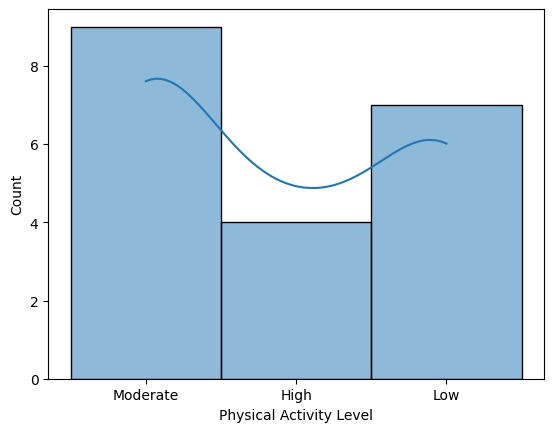

In [412]:
sns.histplot(df['Physical Activity Level'],kde=True)

In [413]:
df_cp['Physical Activity Level'].replace({'Low':0,'Moderate':1,'High':2},inplace=True)

C:\Users\GVS\AppData\Local\Temp\ipykernel_9820\1765801660.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cp['Physical Activity Level'].replace({'Low':0,'Moderate':1,'High':2},inplace=True)
C:\Users\GVS\AppData\Local\Temp\ipykernel_9820\1765801660.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [414]:
df_cp['Physical Activity Level']

0     1
1     1
2     1
3     1
4     2
5     0
6     0
7     1
8     0
9     1
10    1
11    2
12    1
13    0
14    2
15    0
16    0
17    2
18    1
19    0
Name: Physical Activity Level, dtype: int64

In [415]:
df_cp['Dietary Habits'].value_counts()

Dietary Habits
Non-vegetarian    9
Balanced          6
Vegetarian        5
Name: count, dtype: int64

In [416]:
df_cp['Dietary Habits']=df_cp['Dietary Habits'].replace({'Vegetarian':0,'Balanced':1,'Non-vegetarian':2})

C:\Users\GVS\AppData\Local\Temp\ipykernel_9820\3357723457.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cp['Dietary Habits']=df_cp['Dietary Habits'].replace({'Vegetarian':0,'Balanced':1,'Non-vegetarian':2})


In [417]:
df_cp['Dietary Habits']

0     1
1     0
2     2
3     0
4     0
5     1
6     2
7     1
8     2
9     2
10    2
11    0
12    2
13    2
14    1
15    0
16    2
17    2
18    1
19    1
Name: Dietary Habits, dtype: int64

In [418]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     object 
 8   Stress Level             20 non-null     object 
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       17 non-null     object 
 11  Family History           17 non-null     object 
 12  Allergies                15 non-null     object 
 13  Medication Use           15 non-null     object 
 14  Alcohol Consumption      20 

In [419]:
df_cp['Sleep Patterns']=df_cp['Sleep Patterns'].str.split(' ')[0][0]

In [420]:
df_cp['Sleep Patterns']=df_cp['Sleep Patterns'].astype(int)

In [421]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     object 
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       17 non-null     object 
 11  Family History           17 non-null     object 
 12  Allergies                15 non-null     object 
 13  Medication Use           15 non-null     object 
 14  Alcohol Consumption      20 

In [422]:
df_cp['Stress Level'].replace({'Low':0,'Moderate':1,'High':2},inplace=True)

C:\Users\GVS\AppData\Local\Temp\ipykernel_9820\2347465802.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cp['Stress Level'].replace({'Low':0,'Moderate':1,'High':2},inplace=True)
C:\Users\GVS\AppData\Local\Temp\ipykernel_9820\2347465802.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c

In [423]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     int64  
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       17 non-null     object 
 11  Family History           17 non-null     object 
 12  Allergies                15 non-null     object 
 13  Medication Use           15 non-null     object 
 14  Alcohol Consumption      20 

In [424]:
df_cp['Chronic Conditions']=df_cp['Chronic Conditions'].fillna('No')

In [425]:
df_cp['Chronic Conditions'].unique()

array(['Diabetes', 'Hypertension', 'Asthma', 'No'], dtype=object)

In [426]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[[ 'No','Diabetes', 'Hypertension', 'Asthma']])

In [427]:
a=ordinal.fit_transform(df_cp[['Chronic Conditions']])

In [428]:
a=pd.DataFrame(a)

In [429]:
df_cp['Chronic Conditions']=a



In [430]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     int64  
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       20 non-null     float64
 11  Family History           17 non-null     object 
 12  Allergies                15 non-null     object 
 13  Medication Use           15 non-null     object 
 14  Alcohol Consumption      20 

In [431]:
df_cp['Family History']=df_cp['Family History'].replace(np.nan,"Clean")

In [432]:
df_cp['Family History'].unique()

array(['Heart Disease', 'Hypertension', 'Diabetes', 'Clean'], dtype=object)

In [433]:
df_cp.drop(['Family History'],axis=1,inplace=True)

In [434]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     int64  
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       20 non-null     float64
 11  Allergies                15 non-null     object 
 12  Medication Use           15 non-null     object 
 13  Alcohol Consumption      20 non-null     object 
 14  Tobacco Use              20 

In [435]:
df_cp['Allergies']=df_cp['Allergies'].fillna('No')

In [436]:
df_cp['Allergies'].unique()

array(['Pollen', 'No', 'Food Allergies', 'Penicillin'], dtype=object)

In [437]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[['No','Food Allergies','Pollen','Penicillin']])

In [438]:
a=ordinal.fit_transform(df_cp[['Allergies']])

In [439]:
df_cp['Allergies']=pd.DataFrame(a)
df_cp['Allergies']=df_cp['Allergies'].astype(int)

In [440]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     int64  
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       20 non-null     float64
 11  Allergies                20 non-null     int64  
 12  Medication Use           15 non-null     object 
 13  Alcohol Consumption      20 non-null     object 
 14  Tobacco Use              20 

In [441]:
df_cp.drop(['Medication Use'],inplace=True,axis=1)

In [442]:
df_cp['Alcohol Consumption'].unique()

array(['Occasionally', 'No', 'Regularly'], dtype=object)

In [443]:
df_cp.head(2)

,Age,Gender,Height (cm),Weight (kg),BMI,Physical Activity Level,Dietary Habits,Sleep Patterns,Stress Level,Past Surgeries,...,Allergies,Alcohol Consumption,Tobacco Use,Blood Pressure (mmHg),Glucose (mg/dL),Heart Rate (bpm),Temperature (°C),Blood Test Parameters,Blood Test Date,Risk Score
0,50,0,162,95,36.2,1,1,8,1,1,...,2,Occasionally,No,120/80,111,77,37.0,"CBC, BMP, Glucose",2024-09-01,1.0
1,30,0,187,86,24.6,1,0,8,2,0,...,0,No,Yes,140/90,73,75,37.2,"CBC, BMP, Glucose",2024-09-02,1.0


In [444]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[['No','Occasionally','Regularly']])

In [445]:
a=ordinal.fit_transform(df[['Alcohol Consumption']])

In [446]:
df_cp['Alcohol Consumption']=pd.DataFrame(a)
df_cp['Alcohol Consumption']=df_cp['Alcohol Consumption'].astype(int)

In [447]:
df_cp['Tobacco Use'].unique()


array(['No', 'Yes'], dtype=object)

In [448]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[['No','Yes']])

In [449]:
a=ordinal.fit_transform(df[['Tobacco Use']])

In [450]:
df_cp['Tobacco Use'] = pd.DataFrame(a)


In [451]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     int64  
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       20 non-null     float64
 11  Allergies                20 non-null     int64  
 12  Alcohol Consumption      20 non-null     int64  
 13  Tobacco Use              20 non-null     float64
 14  Blood Pressure (mmHg)    20 

In [452]:
df_cp['Tobacco Use']=df_cp['Tobacco Use'].astype(int)

In [453]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     int64  
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       20 non-null     float64
 11  Allergies                20 non-null     int64  
 12  Alcohol Consumption      20 non-null     int64  
 13  Tobacco Use              20 non-null     int64  
 14  Blood Pressure (mmHg)    20 

In [454]:
df_cp['Blood Pressure (mm)']=df_cp['Blood Pressure (mmHg)'].str.split('/')[0][0]
df_cp['Blood Pressure (mm)']=df_cp['Blood Pressure (mm)'].astype(int)

In [455]:
df_cp['Blood Pressure (Hg)']=df_cp['Blood Pressure (mmHg)'].str.split('/')[0][1]


In [456]:
df_cp.drop(['Blood Pressure (mmHg)'],inplace=True,axis=1)

In [457]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     int64  
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       20 non-null     float64
 11  Allergies                20 non-null     int64  
 12  Alcohol Consumption      20 non-null     int64  
 13  Tobacco Use              20 non-null     int64  
 14  Glucose (mg/dL)          20 

In [458]:
df_cp['Blood Pressure (Hg)']=df_cp['Blood Pressure (Hg)'].astype(int)


In [459]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      20 non-null     int64  
 1   Gender                   20 non-null     int64  
 2   Height (cm)              20 non-null     int64  
 3   Weight (kg)              20 non-null     int64  
 4   BMI                      20 non-null     float64
 5   Physical Activity Level  20 non-null     int64  
 6   Dietary Habits           20 non-null     int64  
 7   Sleep Patterns           20 non-null     int64  
 8   Stress Level             20 non-null     int64  
 9   Past Surgeries           20 non-null     int64  
 10  Chronic Conditions       20 non-null     float64
 11  Allergies                20 non-null     int64  
 12  Alcohol Consumption      20 non-null     int64  
 13  Tobacco Use              20 non-null     int64  
 14  Glucose (mg/dL)          20 

In [460]:
df_cp.drop(['Blood Test Parameters'],axis=1,inplace=True)

In [461]:
date = df_cp['Blood Test Date']

In [462]:
df_cp['Blood Test Date']=pd.to_datetime(df_cp['Blood Test Date'])

In [463]:

df_cp['Chronic Conditions']=df_cp['Chronic Conditions'].astype(int)

In [464]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Age                      20 non-null     int64         
 1   Gender                   20 non-null     int64         
 2   Height (cm)              20 non-null     int64         
 3   Weight (kg)              20 non-null     int64         
 4   BMI                      20 non-null     float64       
 5   Physical Activity Level  20 non-null     int64         
 6   Dietary Habits           20 non-null     int64         
 7   Sleep Patterns           20 non-null     int64         
 8   Stress Level             20 non-null     int64         
 9   Past Surgeries           20 non-null     int64         
 10  Chronic Conditions       20 non-null     int64         
 11  Allergies                20 non-null     int64         
 12  Alcohol Consumption      20 non-null  

In [465]:
x=df_cp.drop(['Risk Score'],axis=1)

In [466]:
x.isna().sum()  # Ready

Age                        0
Gender                     0
Height (cm)                0
Weight (kg)                0
BMI                        0
Physical Activity Level    0
Dietary Habits             0
Sleep Patterns             0
Stress Level               0
Past Surgeries             0
Chronic Conditions         0
Allergies                  0
Alcohol Consumption        0
Tobacco Use                0
Glucose (mg/dL)            0
Heart Rate (bpm)           0
Temperature (°C)           0
Blood Test Date            0
Blood Pressure (mm)        0
Blood Pressure (Hg)        0
dtype: int64

In [467]:
y=df_cp['Risk Score']

In [468]:
df_cp['Past Surgeries'].unique()

array([1, 0])

In [469]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Age                      20 non-null     int64         
 1   Gender                   20 non-null     int64         
 2   Height (cm)              20 non-null     int64         
 3   Weight (kg)              20 non-null     int64         
 4   BMI                      20 non-null     float64       
 5   Physical Activity Level  20 non-null     int64         
 6   Dietary Habits           20 non-null     int64         
 7   Sleep Patterns           20 non-null     int64         
 8   Stress Level             20 non-null     int64         
 9   Past Surgeries           20 non-null     int64         
 10  Chronic Conditions       20 non-null     int64         
 11  Allergies                20 non-null     int64         
 12  Alcohol Consumption      20 non-null  

In [470]:
new = pd.read_excel('new.xlsx')

In [473]:
x.to_csv("ex1.csv")

In [476]:
a=pd.read_csv('ex1.csv')

a[a['Blood Pressure (Hg)'].isna()]

,Unnamed: 0,Age,Gender,Height (cm),Weight (kg),BMI,Physical Activity Level,Dietary Habits,Sleep Patterns,Stress Level,...,Chronic Conditions,Allergies,Alcohol Consumption,Tobacco Use,Glucose (mg/dL),Heart Rate (bpm),Temperature (°C),Blood Test Date,Blood Pressure (mm),Blood Pressure (Hg)
20,18,1,170,65,22.5,1.0,1,8,0,0,...,0,1,0,85,70,37,2024-01-01,120,80,NaN
21,45,0,160,60,23.4,1.0,1,7,0,0,...,0,1,0,90,75,37,2024-01-01,120,80,NaN
22,34,1,175,70,22.9,1.0,1,8,0,0,...,0,1,0,88,72,37,2024-01-01,118,70,NaN


In [479]:
df_cp.to_csv('ex1.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Age                      20 non-null     int64         
 1   Gender                   20 non-null     int64         
 2   Height (cm)              20 non-null     int64         
 3   Weight (kg)              20 non-null     int64         
 4   BMI                      20 non-null     float64       
 5   Physical Activity Level  20 non-null     int64         
 6   Dietary Habits           20 non-null     int64         
 7   Sleep Patterns           20 non-null     int64         
 8   Stress Level             20 non-null     int64         
 9   Past Surgeries           20 non-null     int64         
 10  Chronic Conditions       20 non-null     int64         
 11  Allergies                20 non-null     int64         
 12  Alcohol Consumption      20 non-null  